# WELCOME TO MACHINE LEARNING TUTORIALS!
## Task: Prediction - Car Mileage
### Author: SUNGHO LEE, Ph.D.
### Comments/feedbacks will be greatly appreciated!
### Contact Info: DRLEE7979@GMAIL.COM


<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/7/77/%22real_time_display%22_of_mileage_%28%22mpg%22%29_on_Honda_Insight.png/320px-%22real_time_display%22_of_mileage_%28%22mpg%22%29_on_Honda_Insight.png" style="height:200px;">
  
<p>In this exercise you will predict car mileage based on its properties. The data is taken from <a href="http://www-bcf.usc.edu/~gareth/ISL/">ISLR website</a>, but requires few transformations to make it usable for model building. These transformations will include: missing value imputation and normalizing the variables. </p>

<p>This dataset contains 397 car entries with following features:</p>
<ul>
<li>mpg miles per gallon (what we are trying to predict)</li>
<li>cylinders Number of cylinders between 4 and 8</li>
<li>displacement Engine displacement (cu. inches)</li>
<li>horsepower Engine horsepower</li>
<li>weight Vehicle weight (lbs.)</li>
<li>acceleration Time to accelerate from 0 to 60 mph (sec.)</li>
<li>year Model year (modulo 100)</li>
<li>origin Origin of car (1. American, 2. European, 3. Japanese)</li>
<li>name Vehicle name</ul>
</ul>


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#
%matplotlib inline
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
#
import statsmodels.formula.api as sm
#

def normalize(X): # max-min normalizing
    N, m = X.shape
    Y = np.zeros([N, m])
    
    for i in range(m):
        mX = min(X[:,i])
        Y[:,i] = (X[:,i] - mX) / (max(X[:,i]) - mX)
    
    return Y

def scale(col):
    mean_col = np.mean(col)
    sd_col = np.std(col)
    std = (col - mean_col) / sd_col
    return std


# Load the data
auto = pd.read_csv('Auto.csv')
print(auto.info())
print(auto.describe())
auto.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 8 columns):
mpg             397 non-null float64
cylinders       397 non-null int64
displacement    397 non-null float64
horsepower      392 non-null float64
weight          397 non-null int64
acceleration    397 non-null float64
year            397 non-null int64
origin          397 non-null int64
dtypes: float64(4), int64(4)
memory usage: 24.9 KB
None
              mpg   cylinders  displacement  horsepower       weight  \
count  397.000000  397.000000    397.000000  392.000000   397.000000   
mean    23.515869    5.458438    193.532746  104.469388  2970.261965   
std      7.825804    1.701577    104.379583   38.491160   847.904119   
min      9.000000    3.000000     68.000000   46.000000  1613.000000   
25%     17.500000    4.000000    104.000000   75.000000  2223.000000   
50%     23.000000    4.000000    146.000000   93.500000  2800.000000   
75%     29.000000    8.000000    262.000000  126

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,1
1,15.0,8,350.0,165.0,3693,11.5,70,1
2,18.0,8,318.0,150.0,3436,11.0,70,1
3,16.0,8,304.0,150.0,3433,12.0,70,1
4,17.0,8,302.0,140.0,3449,10.5,70,1


<h3>Q.1. Write a command that will calculate the number of missing values in this dataset</h3>

In [2]:
# Command(s)
num = auto.isnull().sum()
print(num)

#Index_bad = (auto[]=="?") | (auto[]=="NA") | (auto[]==" ")
#print(Index_bad.info())
#print(Index_bad.describe())
#Index_bad.head()

mpg             0
cylinders       0
displacement    0
horsepower      5
weight          0
acceleration    0
year            0
origin          0
dtype: int64


<h3>Q.2. Write a command that will only show the rows with missing values. Can you comment on why the values might be missing (e.g. excessive prevalence of specific feature)?</h3>

In [3]:
# Command:
null_data = auto[auto.isnull().any(axis=1)]
print(null_data)
# Comment (One - two sentence)
#

      mpg  cylinders  displacement  horsepower  weight  acceleration  year  \
32   25.0          4          98.0         NaN    2046          19.0    71   
126  21.0          6         200.0         NaN    2875          17.0    74   
330  40.9          4          85.0         NaN    1835          17.3    80   
336  23.6          4         140.0         NaN    2905          14.3    80   
354  34.5          4         100.0         NaN    2320          15.8    81   

     origin  
32        1  
126       1  
330       2  
336       1  
354       2  


<h3>Q.3. Impute the missing values using median for the column. Given answer to Q.2, is this a good approach to fix the missing value problem?</h3>

In [4]:
# Command(s):
Index_bad = auto['horsepower'].isnull()
Index_good = ~Index_bad
auto.loc[Index_bad,'horsepower'] = auto.loc[Index_good,'horsepower'].mean()

# To check above imputation process completed well. 
# To compute the number of missing values again:
num = auto.isnull().sum()
print(num)

# Comment (one sentence):
# 

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
year            0
origin          0
dtype: int64


In [5]:
y_output = auto['mpg']

<h3>Q.4. Develop a model that predicts mpg using all the available features in the data.frame. Summarize it and comment on its quality. </h3>

In [6]:
# Develop the model 
# Put the command (or commands) here that would give answer to the above question
ols_model = sm.ols(formula = 'mpg ~ cylinders + displacement + horsepower + weight + acceleration + year + origin', data = auto)
y_pred = ols_model.fit().predict()
results = ols_model.fit()
# Get slope (m) and y-intercept (b)
print('Scaled: Intercept, Slope : {}'.format(results.params))
# Get the t-values (hypothesis test statistics) for linear regression coefficient hypothesis tests.
print('Intercept t-value, Slope t-values: \n{}'.format(results.tvalues))
# Get p-values for above t-value statistics
print('\nHypothesis test summary for each coefficient if they differ from zero:')
print(results.pvalues)
print('\nSSE, SST, SSR, and RMSE:')
mean_y = np.mean(y_output)
sst = np.sum((y_output - mean_y)**2)
sse = sst - results.ssr
print('SSE: {}'.format(sse))
print('SST: {}'.format(sst))
print('SSR: {}'.format(results.ssr))
print('RMSE: {}'.format(np.sqrt(results.mse_model)))
# Get most of the linear regression statistics we are interested in:
print(results.summary())

# Comment on its quality 
# 1. Adjusted R^2 ~ 0.82
# 2. The range of entire coefficients for all features is very wide


Scaled: Intercept, Slope : Intercept      -18.711572
cylinders       -0.445205
displacement     0.018913
horsepower      -0.009394
weight          -0.006732
acceleration     0.117888
year             0.762458
origin           1.396799
dtype: float64
Intercept t-value, Slope t-values: 
Intercept       -4.059871
cylinders       -1.380467
displacement     2.523511
horsepower      -0.708868
weight         -10.507992
acceleration     1.217304
year            15.071432
origin           5.073203
dtype: float64

Hypothesis test summary for each coefficient if they differ from zero:
Intercept       5.938216e-05
cylinders       1.682356e-01
displacement    1.201645e-02
horsepower      4.788310e-01
weight          6.675736e-23
acceleration    2.242267e-01
year            9.395934e-41
origin          6.069969e-07
dtype: float64

SSE, SST, SSR, and RMSE:
SSE: 19926.349169166893
SST: 24252.31002518892
SSR: 4325.960856022027
RMSE: 53.35373754369027
                            OLS Regression Results  

<h3>Q.5. Show histogram of engine displacement to reveal its non-normal distribution. Normalize this feature by either applying Box-Cox transformation or any normalization tool from Scikit-learn. Plot this new feature to see whether it is now normally distributed.</h3>

C:\Users\sl\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\sl\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Displacement_Scaled Histogram')

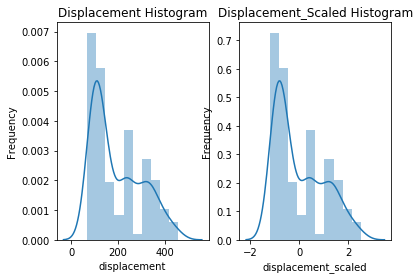

In [7]:
# Histogram of engine displacement
plt.subplot(1, 2, 1)
sns.distplot(auto['displacement'], hist=True)
plt.xlabel('displacement')
plt.ylabel('Frequency')
plt.title('Displacement Histogram')

# Add scaled x to data frame
auto['displacement_scale'] = scale(auto['displacement'])
plt.subplot(1, 2, 2)
sns.distplot(auto['displacement_scale'], hist=True)
plt.xlabel('displacement_scaled')
plt.ylabel('Frequency')
plt.title('Displacement_Scaled Histogram')

## Preprocessing the data for classification
##""" Preprocessing the data for classification """
##r = 0.1 # ratio of test data over all data (this can be changed to any number between 0.0 and 1.0 (not inclusive)
#N, m = auto.shape
#auto_features_NumericOnly = auto.loc[1:N,1:m] # get rid of headers & output feature (mpg)
#auto_features_NumericOnly = normalize(auto_features_NumericOnly) # inputs (features)
#auto_norm = deepcopy(auto)
#auto_norm[1:N,1:m] = auto_features_NumericOnly


# Plot histogram of this new feature to reveal normal-like distribution


<h3>Q.7. Recalculate the model to predict mpg with the new feature and comment on its performance in comparison to the original model.</h3>

In [8]:
# Calculate then new model
# Develop the model 
# Put the command (or commands) here that would give answer to the above question
ols_model_2 = sm.ols(formula = 'mpg ~ cylinders + displacement_scale + horsepower + weight + acceleration + year + origin', data = auto)
y_pred_2 = ols_model_2.fit().predict()
results_2 = ols_model_2.fit()
# Get slope (m) and y-intercept (b)
print('Scaled: Intercept, Slope : {}'.format(results_2.params))
# Get the t-values (hypothesis test statistics) for linear regression coefficient hypothesis tests.
print('Intercept t-value, Slope t-values: \n{}'.format(results_2.tvalues))
# Get p-values for above t-value statistics
print('\nHypothesis test summary for each coefficient if they differ from zero:')
print(results_2.pvalues)
print('\nSSE, SST, SSR, and RMSE:')
mean_y = np.mean(y_output)
sst = np.sum((y_output - mean_y)**2)
sse = sst - results_2.ssr
print('SSE: {}'.format(sse))
print('SST: {}'.format(sst))
print('SSR: {}'.format(results_2.ssr))
print('RMSE: {}'.format(np.sqrt(results_2.mse_model)))
# Get most of the linear regression statistics we are interested in:
print(results_2.summary())

# Comment on its quality 
# 1. Adjusted R^2 ~ 0.82
# 2. No big improvement seen yet on adjusted R^2


Scaled: Intercept, Slope : Intercept            -15.051354
cylinders             -0.445205
displacement_scale     1.971607
horsepower            -0.009394
weight                -0.006732
acceleration           0.117888
year                   0.762458
origin                 1.396799
dtype: float64
Intercept t-value, Slope t-values: 
Intercept             -3.060193
cylinders             -1.380467
displacement_scale     2.523511
horsepower            -0.708868
weight               -10.507992
acceleration           1.217304
year                  15.071432
origin                 5.073203
dtype: float64

Hypothesis test summary for each coefficient if they differ from zero:
Intercept             2.365303e-03
cylinders             1.682356e-01
displacement_scale    1.201645e-02
horsepower            4.788310e-01
weight                6.675736e-23
acceleration          2.242267e-01
year                  9.395934e-41
origin                6.069969e-07
dtype: float64

SSE, SST, SSR, and RMSE:
SS

<h3>Q.8. What is the mean and standard deviation for all the features?</h3>

In [9]:
print(auto.describe())

              mpg   cylinders  displacement  horsepower       weight  \
count  397.000000  397.000000    397.000000  397.000000   397.000000   
mean    23.515869    5.458438    193.532746  104.469388  2970.261965   
std      7.825804    1.701577    104.379583   38.247388   847.904119   
min      9.000000    3.000000     68.000000   46.000000  1613.000000   
25%     17.500000    4.000000    104.000000   76.000000  2223.000000   
50%     23.000000    4.000000    146.000000   95.000000  2800.000000   
75%     29.000000    8.000000    262.000000  125.000000  3609.000000   
max     46.600000    8.000000    455.000000  230.000000  5140.000000   

       acceleration        year      origin  displacement_scale  
count    397.000000  397.000000  397.000000        3.970000e+02  
mean      15.555668   75.994962    1.574307        2.312732e-16  
std        2.749995    3.690005    0.802549        1.001262e+00  
min        8.000000   70.000000    1.000000       -1.204174e+00  
25%       13.800000  

<h3>Q.9. Center all the features, so that their mean is 0 and scale them, so that their standard deviation is 1. Recalculate the model, comment on its performance.</h3>

In [10]:
# Center and scale
# Add scaled x to data frame
auto['cylinders_scale'] = scale(auto['cylinders'])
auto['displacement_scale'] = scale(auto['displacement'])
auto['horsepower_scale'] = scale(auto['horsepower'])
auto['weight_scale'] = scale(auto['weight'])
auto['acceleration_scale'] = scale(auto['acceleration'])
auto['year_scale'] = scale(auto['year'])
auto['origin_scale'] = scale(auto['origin'])

# Recalculate the model
# Calculate then new model
# Develop the model 
# Put the command (or commands) here that would give answer to the above question
ols_model_3 = sm.ols(formula = 'mpg ~ cylinders_scale + displacement_scale + horsepower_scale + weight_scale + acceleration_scale + year_scale + origin_scale', data = auto)
y_pred_3 = ols_model_3.fit().predict()
results_3 = ols_model_3.fit()
# Get slope (m) and y-intercept (b)
print('Scaled: Intercept, Slope : {}'.format(results_3.params))
# Get the t-values (hypothesis test statistics) for linear regression coefficient hypothesis tests.
print('Intercept t-value, Slope t-values: \n{}'.format(results_3.tvalues))
# Get p-values for above t-value statistics
print('\nHypothesis test summary for each coefficient if they differ from zero:')
print(results_3.pvalues)
print('\nSSE, SST, SSR, and RMSE:')
mean_y = np.mean(y_output)
sst = np.sum((y_output - mean_y)**2)
sse = sst - results_3.ssr
print('SSE: {}'.format(sse))
print('SST: {}'.format(sst))
print('SSR: {}'.format(results_3.ssr))
print('RMSE: {}'.format(np.sqrt(results_3.mse_model)))
# Get most of the linear regression statistics we are interested in:
print(results_3.summary())

# Comment on its quality 
# 1. Adjusted R^2 ~ 0.82
# 2. No big improvement seen yet on adjusted R^2

# Comment on its performance


Scaled: Intercept, Slope : Intercept             23.515869
cylinders_scale       -0.756596
displacement_scale     1.971607
horsepower_scale      -0.358845
weight_scale          -5.701259
acceleration_scale     0.323784
year_scale             2.809929
origin_scale           1.119588
dtype: float64
Intercept t-value, Slope t-values: 
Intercept             140.504358
cylinders_scale        -1.380467
displacement_scale      2.523511
horsepower_scale       -0.708868
weight_scale          -10.507992
acceleration_scale      1.217304
year_scale             15.071432
origin_scale            5.073203
dtype: float64

Hypothesis test summary for each coefficient if they differ from zero:
Intercept             0.000000e+00
cylinders_scale       1.682356e-01
displacement_scale    1.201645e-02
horsepower_scale      4.788310e-01
weight_scale          6.675736e-23
acceleration_scale    2.242267e-01
year_scale            9.395934e-41
origin_scale          6.069969e-07
dtype: float64

SSE, SST, SSR, and 